In [95]:
with open('Москва_2021.txt', 'r') as infile:
    dataraw = infile.read()
data = [(int(item), dataraw.count(item)) for item in sorted(set(dataraw.splitlines()))]
print(data)
dataraw2 = [int(item) for item in dataraw.splitlines()]
print(dataraw2)

[(14, 49), (15, 53), (16, 236), (17, 126), (18, 806), (19, 971), (20, 910), (21, 716), (22, 944), (23, 1071), (24, 810), (25, 1050), (26, 980), (27, 1263), (28, 1113), (29, 1340), (30, 734), (31, 1115), (32, 796), (33, 758), (34, 869), (35, 676), (36, 1198), (37, 522), (38, 1006), (39, 695), (40, 723), (41, 837), (42, 978), (43, 820), (44, 1032), (45, 690), (46, 677), (47, 831), (48, 1026), (49, 1060), (50, 150), (51, 188), (52, 193), (53, 47), (54, 26), (55, 62), (56, 76), (57, 136), (58, 262), (59, 74), (60, 266), (61, 226), (62, 139), (63, 183), (64, 189), (65, 79), (66, 188), (67, 128), (69, 202), (70, 26), (71, 85), (73, 17)]
[23, 32, 27, 26, 44, 49, 63, 34, 66, 66, 38, 27, 28, 35, 26, 46, 62, 44, 22, 35, 31, 31, 27, 37, 32, 49, 31, 22, 18, 29, 30, 20, 31, 18, 69, 36, 28, 38, 62, 25, 38, 32, 31, 18, 48, 38, 40, 21, 25, 27, 44, 45, 29, 41, 24, 19, 29, 67, 41, 44, 25, 22, 42, 40, 21, 44, 29, 34, 63, 32, 49, 34, 35, 23, 45, 26, 36, 46, 36, 45, 38, 31, 24, 29, 41, 31, 27, 41, 33, 20, 

In [96]:
average = sum(k[0] * k[1] for k in data) / sum(k[1] for k in data)
variance = sum((item[0] - average) ** 2 * item[1] for item in data) / sum(item[1] for item in data)
stddev = variance ** 0.5

mode = max(data, key=lambda x: x[1])

median = 0
total = 0
for value, freq in sorted(data):
    total += freq
    if total >= sum(k[1] for k in data) / 2:
        median = value
        break

range_val = max(k[0] for k in data) - min(k[0] for k in data)

variation_coefficient = stddev / average

average +- z_(gamma/2)*stddev/sqrt(n)
z_(gamma/2)*stddev/sqrt(n) < delta

n >= (z_(gamma/2)*sigma/delta)**2

In [97]:
from math import ceil, floor
num_samples = 36
gamma = 0.95
z = 1.96  # table value for normal distribution (stddev is known)
delta = 3
#seed = 104


n = ceil((z * stddev / delta) ** 2)
print(n)

trust_interval = (average - z * stddev / n ** 0.5, average + z * stddev / n ** 0.5)
print(trust_interval)

62
(32.37646842478273, 38.36954520751533)


In [98]:
import random

samples = [random.choices(dataraw2, k=n) for _ in range(num_samples)]
print(samples)
sample_means = [sum(s) / n for s in samples]
print(sample_means)


[[28, 38, 45, 43, 23, 41, 51, 23, 34, 45, 23, 28, 49, 65, 46, 25, 21, 50, 26, 40, 28, 30, 58, 22, 61, 27, 23, 44, 20, 27, 46, 37, 45, 24, 46, 27, 25, 57, 31, 36, 28, 18, 59, 46, 22, 33, 42, 34, 46, 29, 45, 23, 28, 33, 35, 30, 36, 40, 29, 24, 48, 55], [22, 25, 15, 29, 63, 23, 48, 60, 46, 61, 45, 31, 25, 37, 66, 49, 21, 22, 29, 34, 43, 59, 40, 61, 21, 49, 26, 28, 39, 20, 61, 25, 36, 58, 61, 44, 38, 60, 61, 28, 36, 47, 38, 25, 31, 52, 29, 21, 26, 46, 44, 26, 62, 57, 27, 46, 22, 19, 28, 25, 24, 31], [44, 36, 38, 29, 31, 23, 35, 42, 18, 45, 23, 63, 36, 29, 31, 22, 48, 20, 26, 34, 27, 69, 31, 35, 23, 28, 38, 29, 25, 67, 34, 36, 29, 18, 42, 27, 26, 41, 36, 44, 27, 29, 36, 34, 22, 48, 20, 32, 35, 22, 27, 20, 49, 60, 57, 45, 18, 21, 52, 25, 21, 34], [29, 56, 28, 30, 18, 36, 44, 47, 70, 28, 48, 29, 35, 27, 28, 28, 38, 33, 49, 23, 64, 28, 40, 43, 23, 31, 21, 62, 45, 21, 27, 36, 27, 35, 41, 44, 67, 60, 30, 41, 21, 47, 23, 52, 34, 40, 24, 23, 63, 39, 18, 38, 23, 32, 22, 32, 29, 41, 61, 36, 25, 42],

In [99]:
a = floor(min(sample_means))
b = ceil(max(sample_means))
print('min boundary: ', a)
print('max boundary: ', b)

intervals = list(range(a, b))
freq = [0] * (b - a)
for mean in sample_means:
    idx = int(mean) - a
    if idx == len(freq):  
        idx -= 1
    freq[idx] += 1

print(freq)
print(sum(freq))

rel_freq = [f / len(sample_means) for f in freq]
print(rel_freq)

intervals = [(intervals[i], intervals[i] + 1, rel_freq[i]) for i in range(len(intervals))]
print(intervals)

min boundary:  31
max boundary:  39
[1, 3, 3, 7, 12, 6, 3, 1]
36
[0.027777777777777776, 0.08333333333333333, 0.08333333333333333, 0.19444444444444445, 0.3333333333333333, 0.16666666666666666, 0.08333333333333333, 0.027777777777777776]
[(31, 32, 0.027777777777777776), (32, 33, 0.08333333333333333), (33, 34, 0.08333333333333333), (34, 35, 0.19444444444444445), (35, 36, 0.3333333333333333), (36, 37, 0.16666666666666666), (37, 38, 0.08333333333333333), (38, 39, 0.027777777777777776)]


In [100]:
mean_sample_means = sum(sample_means) / len(sample_means)
variance_sample_means = sum((x - mean_sample_means) ** 2 for x in sample_means) / len(sample_means)
stddev_sample_means = variance_sample_means ** 0.5
print(f"expected value (sample means) = {mean_sample_means:.3f}")
print(f"variance (sample means) = {variance_sample_means:.3f}")
print(f"std deviation (sample means) = {stddev_sample_means:.3f}")

expected value (sample means) = 35.199
variance (sample means) = 2.352
std deviation (sample means) = 1.534


[31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5]


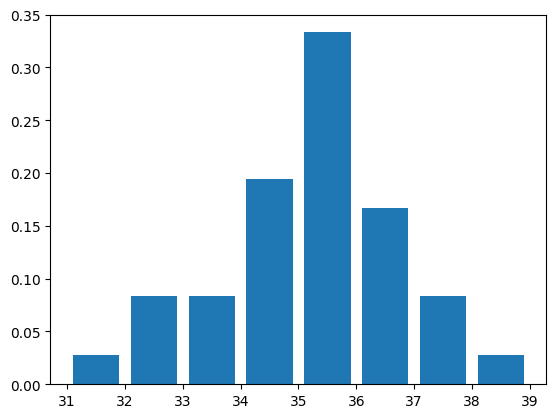

In [101]:
from matplotlib import pyplot as plt
midpoints = [(a + b) / 2 for a, b, f in intervals]
print(midpoints)
plt.bar(midpoints, rel_freq)
plt.show()


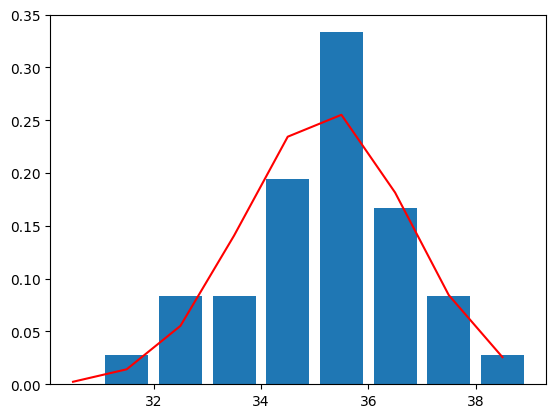

In [102]:
import math

mean_sample_means = sum(sample_means) / len(sample_means)
std_sample_means = (sum((x - mean_sample_means) ** 2 for x in sample_means) / len(sample_means)) ** 0.5

bin_width = midpoints[1] - midpoints[0]
x_vals = [min(midpoints) - 1 + i for i in range(int((max(midpoints) - min(midpoints) + 2)))]

gauss_vals = [
    (1 / (std_sample_means * math.sqrt(2 * math.pi))) * math.exp(-((x - mean_sample_means) ** 2) / (2 * std_sample_means ** 2)) * bin_width
    for x in x_vals
]

plt.bar(midpoints, rel_freq)
plt.plot(x_vals, gauss_vals, 'r')
plt.show()

In [103]:
from scipy.stats import t

toanalyse = samples[0]
mean = sum(toanalyse)/len(toanalyse)
print(f'Точечная оценка: {mean}')
alpha = 1 - gamma
dfree = len(toanalyse) - 1
sample_std = (sum((x - mean) ** 2 for x in toanalyse) / dfree) ** 0.5
t_crit = t.ppf(1 - alpha / 2, dfree)
print('t:', t_crit)
margin = t_crit * sample_std / (len(toanalyse) ** 0.5)
trust_interval_sample = (float(mean - margin), float(mean + margin))
print('Доверительный интервал:', trust_interval_sample)
accuracy = z * stddev / (n ** 0.5)
print('Точность выборочного среднего', accuracy)

Точечная оценка: 36.145161290322584
t: 1.9996235849949393
Доверительный интервал: (33.14639683842488, 39.14392574222029)
Точность выборочного среднего 2.9965383913663017


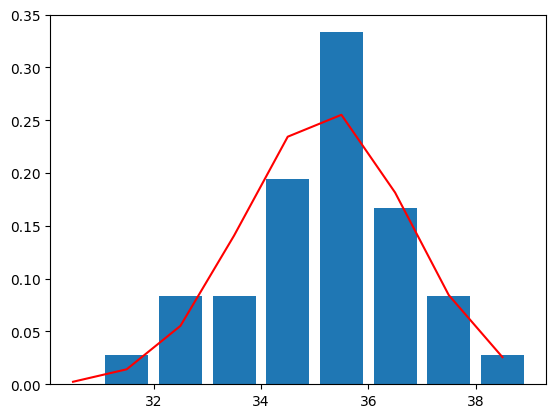

In [104]:
plt.plot(x_vals, [y for y in gauss_vals], 'r')
plt.bar(midpoints, rel_freq)
plt.show()